<a href="https://colab.research.google.com/github/woodword-0/NLP_Project_SJ/blob/main/KMeansCosineSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns
from numpy.linalg import norm

model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

In [ ]:
model = hub.load(model_url)

In [ ]:
#Cosine Similarity
def cos_sim(a,b):
  return np.inner(a,b)/(norm(a)*norm(b))

In [ ]:
#Building an embedder
def embed(input):
  return model(input)

In [ ]:
word = "elephant"
sentence = "This is my sentence there are many like it but this is mine"
paragraph = (
    "I dont know how to explain it Dave. I think what would be best is to put it back and let it fail."
    "The Hal 9000 series has never made an error of this nature."
    "We ran the problem in the it's twin niner triple zero computer and it correctly predicted the fault."
    "I don't know what to tell you."
    
)

In [ ]:
#Group these together
messages = [word, sentence, paragraph]
message_embeddings = embed(messages)

In [ ]:
message_embeddings

<tf.Tensor: shape=(3, 512), dtype=float32, numpy=
array([[ 0.00834449,  0.00048086,  0.06595249, ..., -0.03266348,
         0.02640912, -0.0606688 ],
       [-0.02862448,  0.02419903, -0.0113885 , ..., -0.00106901,
        -0.02550069, -0.02226856],
       [-0.0521406 , -0.05310674, -0.06715544, ..., -0.00162683,
         0.03718123, -0.02282867]], dtype=float32)>

In [ ]:
#Display it in a cool way
for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message:{}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join((str(x) for x in message_embedding[:3]))
  print("Embedding: [{},...]\n".format(message_embedding_snippet))

Message:elephant
Embedding size: 512
Embedding: [0.008344486355781555, 0.00048085825983434916, 0.06595248728990555,...]

Message:This is my sentence there are many like it but this is mine
Embedding size: 512
Embedding: [-0.028624480590224266, 0.024199027568101883, -0.0113885048776865,...]

Message:I dont know how to explain it Dave. I think what would be best is to put it back and let it fail.The Hal 9000 series has never made an error of this nature.We ran the problem in the it's twin niner triple zero computer and it correctly predicted the fault.I don't know what to tell you.
Embedding size: 512
Embedding: [-0.05214059725403786, -0.05310673639178276, -0.06715544313192368,...]



In [ ]:
#Comparison methods
messages = [#Cars
"This is a fast car",
"That car is shiny",
"my toyota is expensive",

#Computers
"I wish I had a faster video card",
"my QWERTY keyboards is faulty",
"I have a fast Graphics card",
"I have a slow gtx card",

#Weather

"There is a cold front coming",
"Winter is Here!",
"I wish it would snow",
"Did the groundhog see it's shadow?",

#Misc
"Buffalo Buffalo, Buffalo,  Buffalo...",
"May the Farce be with you",
"I'm a Mog",
"I'm my own best friend",

#Animals
"Elephant",
"Large grey mammal with tusks. Native of Africa and South Asia",
"Large oceanic creature that breathes air and nurses young",
]

In [ ]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale= 1.2)
  g = sns.heatmap(corr, xticklabels= labels, yticklabels= labels, vmin = 0, vmax =1, cmap="YlOrRd")
  g.set_xticklabels(labels, rotation = rotation) 
  g.set_title("Semantic Textual Similarity")
def plot_cos_similarity(labels, features, rotation):
  corr = cos_sim(features, features)
  sns.set(font_scale= 1.2)
  g = sns.heatmap(corr, xticklabels= labels, yticklabels= labels, vmin = 0, vmax =1, cmap="YlOrRd")
  g.set_xticklabels(labels, rotation = rotation) 
  g.set_title("Semantic Textual Cosine Similarity")  

def run_and_plot(messages_):
  message_embeddings_=embed(messages) 
  plot_similarity(messages_,message_embeddings_, 90)
def run_and_plot_cos(messages_):
  message_embeddings_=embed(messages) 
  plot_cos_similarity(messages_,message_embeddings_, 90)

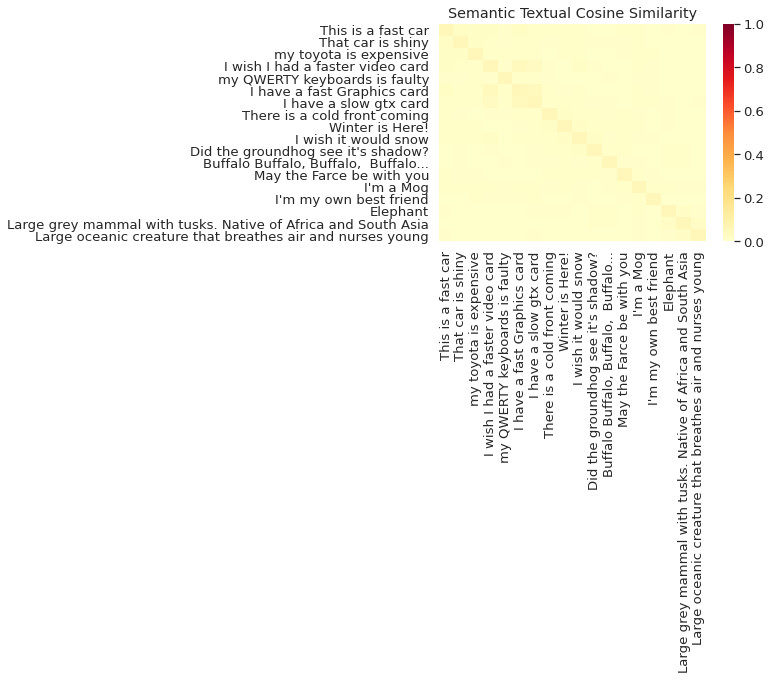

In [ ]:
run_and_plot_cos(messages)

K-Means

In [ ]:
class KMeans:
    def __init__(self, K=2, tolerance=0.001, max_iterations=300, gamma=1e-3):
        self.K = K
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.gamma = gamma

    def fit(self, X):

        self.cent = {}

        for i in range(self.K):
            self.cent[i] = X[i]

        for i in range(self.max_iterations):
            self.clf = {}

            for i in range(self.K):
                self.clf[i] = []

            for features in X:
                distance = [np.linalg.norm(features-self.cent[centroid]) for centroid in self.cent]
                classification = distance.index(min(distance))
                self.clf[classification].append(features)

            prev_cent = dict(self.cent)

            for classification in self.clf:
                self.cent[classification] = np.average(self.clf[classification],axis=0)

            optimized = True

            for c in self.cent:

                prev_centroids = dict(self.cent)

                original_centroid = prev_cent[c]
                current_centroid = self.cent[c]
                if np.sum((current_centroid-original_centroid)/(original_centroid + self.gamma)*100.0) > self.tolerance:
                    optimized = False

            if optimized:
                break

    def predict(self, X):
        clf = []
        for i in range(len(X)):
          distance = [np.linalg.norm(X[i]-self.cent[centroid]) for centroid in self.cent]
          clf.append(np.argmin(np.array(distance)))
        return clf